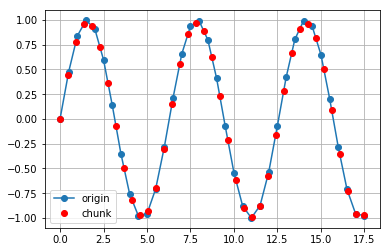

In [2]:
from matplotlib.pyplot import *
from math import *
import sys


def src(m, n, xs):
    def inter(i):
        j, k = (i * m) // n, ((i * m) % n) / n
        return xs[j] * (1 - k) + xs[j + 1] * k
    return [inter(i) for i in range((len(xs) - 1) * n // m)]


class src_discret():
    def __init__(self, m, n):
        self.b_in = self.b_out = self.last = 0
        self.m, self.n = m, n

    def src(self, xs):
        def get_coeff(i):
            return (i * self.m) // self.n, ((i * self.m) % self.n) / self.n

        def linear(a, b, k):
            return a * (1 - k) + b * k
        ys = []
        i = self.b_out
        while True:
            j, k = get_coeff(i)
            j -= self.b_in
            if j != -1:
                break
            i += 1
            ys.append(linear(self.last, xs[0], k))
        while True:
            j, k = get_coeff(i)
            j -= self.b_in
            if j + 1 >= len(xs):
                break
            i += 1
            ys.append(linear(xs[j], xs[j + 1], k))
        self.b_out += len(ys)
        self.b_in += len(xs)
        self.last = xs[-1]
        return ys


x = [i / 2. for i in range(6 * 3 * 2)]
y = [sin(i) for i in x]

dh = 0.2
h = 0
plot(x, y, "o-", label="origin")

x2 = src(11, 12, x)
z2 = src(11, 12, y)

if 0:
    h += dh
    plot(x2, [z-h for z in z2], "o", label="oneshot")


def concatMap(f, xs):
    import itertools
    return list(itertools.chain(*[f(x) for x in xs]))


def chunked(xs, chunk):
    return [xs[i:i+chunk] for i in range(len(xs)) if i % chunk == 0]

src1 = src_discret(441, 480)
src2 = src_discret(441, 480)
x3 = concatMap(src1.src, chunked(x, 4))
z3 = concatMap(src2.src, chunked(y, 4))
h += dh
plot(x3, [z for z in z3], "ro", label="chunk")

if 0:
    src3 = src_discret(480, 441)
    src4 = src_discret(480, 441)
    x4 = concatMap(src3.src, chunked(x, 5))
    z4 = concatMap(src4.src, chunked(y, 5))
    h += dh
    plot(x4, [z for z in z4], "o-", label="rev")

legend()
grid()
show()